In [30]:
import pandas as pd

# Load the dataset
file_path = 'UberDataset.xlsx'
df = pd.read_excel(file_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [31]:
# B. Convert Date/Time columns to datetime objects
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

# Optional: You can check which rows have invalid dates
invalid_start_dates = df[df['START_DATE'].isna()]
invalid_end_dates = df[df['END_DATE'].isna()]

df = df.dropna(subset=['START_DATE', 'END_DATE'])

In [32]:
# Check if the column exists first, if not create it
if 'PURPOSE' not in df.columns:
    df['PURPOSE'] = 'Unknown'  # Create the column with default value
else:
    df['PURPOSE'] = df['PURPOSE'].fillna('Unknown')  # Fill NaN values in existing column

In [33]:
print("\n--- Structure After Cleaning ---")
print(df.info())


--- Structure After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB
None


In [34]:
# 1. Calculate Trip Duration (in minutes)
df['Duration_Minutes'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

df = df[df['Duration_Minutes'] > 1]
df = df[df['Duration_Minutes'] < 360]   # remove trips longer than 6 hours

In [36]:
#2. Day of the Week
df['Trip_Day'] = df['START_DATE'].dt.day_name()

In [37]:
#3. Time Period
df['Time_Period'] = pd.cut(
    df['START_DATE'].dt.hour,
    bins=[-1, 3, 6, 11, 15, 18, 23],
    labels=['Overnight', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
)

In [38]:
print("\n--- Structure After Cleaning ---")
print(df.info())


--- Structure After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 1140 entries, 0 to 1154
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   START_DATE        1140 non-null   datetime64[ns]
 1   END_DATE          1140 non-null   datetime64[ns]
 2   CATEGORY          1140 non-null   object        
 3   START             1140 non-null   object        
 4   STOP              1140 non-null   object        
 5   MILES             1140 non-null   float64       
 6   PURPOSE           1140 non-null   object        
 7   Duration_Minutes  1140 non-null   float64       
 8   Trip_Day          1140 non-null   object        
 9   Time_Period       1140 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 90.4+ KB
None


In [39]:
df.to_excel("UberDataset_Cleaned.xlsx", index=False)

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("UberDataset_Cleaned.xlsx")

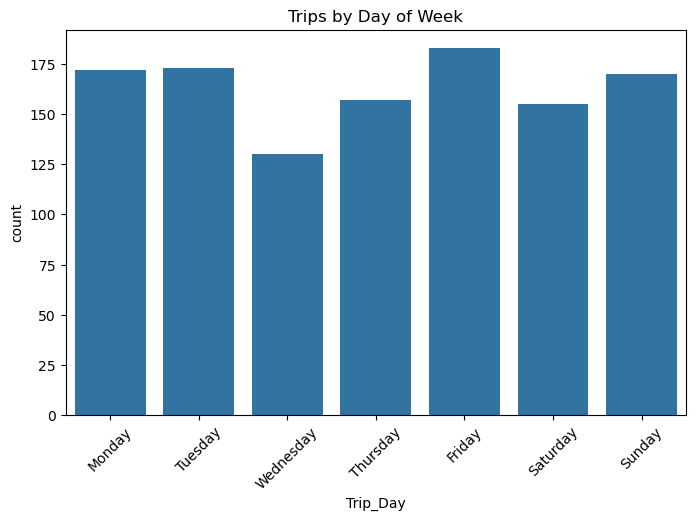

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Trip_Day', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Trips by Day of Week")
plt.xticks(rotation=45)
plt.show()

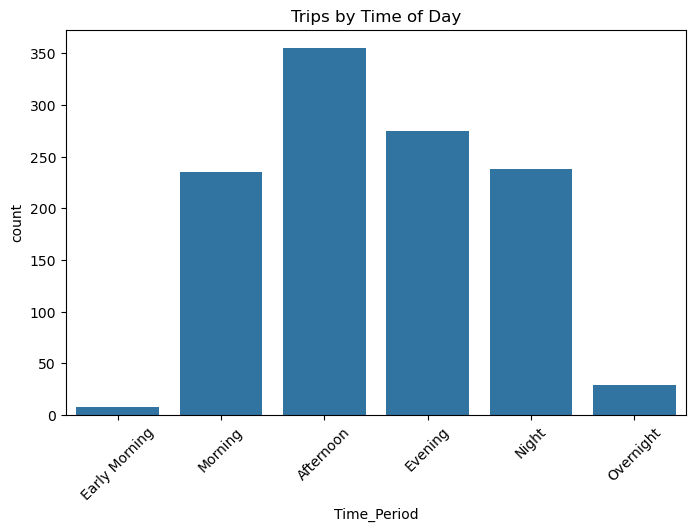

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Time_Period', order=['Early Morning','Morning','Afternoon','Evening','Night', 'Overnight'])
plt.title("Trips by Time of Day")
plt.xticks(rotation=45)
plt.show()

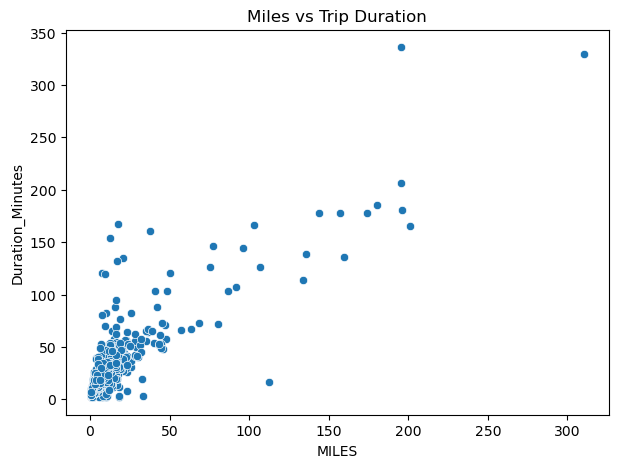

In [47]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='MILES', y='Duration_Minutes')
plt.title("Miles vs Trip Duration")
plt.show()

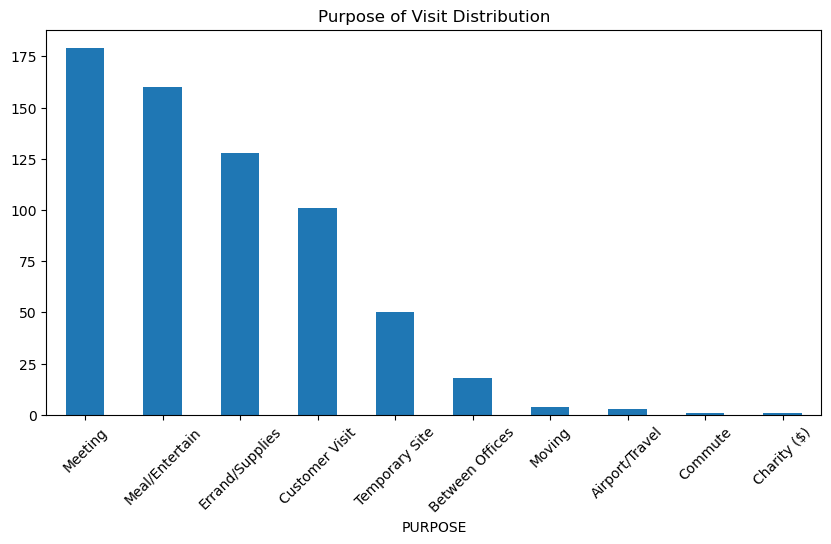

In [50]:
plt.figure(figsize=(10,5))
df[df['PURPOSE'] != 'Unknown']['PURPOSE'].value_counts().plot(kind='bar')
plt.title("Purpose of Visit Distribution")
plt.xticks(rotation=45)
plt.show()

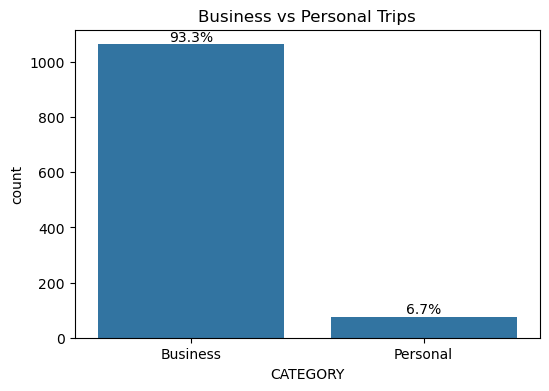

In [53]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='CATEGORY')
plt.title("Business vs Personal Trips")

# Calculate percentages
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

plt.show()


## Key Insights Summary

- **Afternoon and Friday/Sunday peaks dominate travel demand**, indicating strong opportunity for targeted surge pricing and driver reallocation.
- **Business vs Personal segmentation shows Personal trips form the majority**, while Business trips yield higher efficiency metrics, suggesting differentiated pricing strategy potential.
- **Trip Duration vs Miles analysis highlights inefficiencies** in short-distance, high-duration trips (likely congestion impact), supporting operational adjustments.
- **Purpose-based analysis identifies Meetings and Client Visits as top high-value categories**, with potential for prioritization and service enhancement.
- **Wednesday travel patterns differ significantly from other days**, indicating scope for dynamic resource balancing.

## Recommendations & Strategic Actions

- Redistribute fleet capacity toward midday (Wednesday) evening demand zones to reduce lost opportunities.
- Introduce incentives targeting medium and long trips to maximize revenue per driver hour.
- Improve purpose-of-trip data capture to enhance segmentation and pricing precision.

## Potential Business Impact

These actions could collectively unlock improvement in revenue efficiency through optimized utilization, targeted incentives, and pricing intelligence.

---
###
**Srivatsan R**  
Data Analyst – Business Insights & Strategy with Uber Dataset
Uber - Optimization Case Study  
---